### Install pandas, numpy, matplotlib, scikit-learn 

In [1]:

%pip install pandas numpy matplotlib scikit-learn seaborn --quiet
print('-' * 60 + "\nAll libaries are installed")

Note: you may need to restart the kernel to use updated packages.
------------------------------------------------------------
All libaries are installed


### Import data and showing it of

In [2]:

import pandas as pd

#Read data csv file
df = pd.read_csv("../data/winequality-red.csv")

print("-" * 60 + "\nShow the first 5 rows:\n")
print(df.head())

print("-" * 60 + "\nShow rows and columns:\n(Rows, Columns)\n")
print(df.shape)

print("-" * 60 + "\nShow all the columns:\n")
df.columns

#Show statictics for numbered columns
print("-" * 60 + "\nShow a description of the data:\n")
print(df.describe())

print("The first 11 columns are chemical molecules inside of wine which are:")
print("Fixed acidity = stable acids in wine that do not evaporate and contribute to the wine's taste and structure\n" \
"Volatile acidity = gaseous acids, primarily acetic acid, which can give wine a vinegar-like smell\n" \
"Citric acid = a weak organic acid found in small amounts in wine grapes, playing a role in the fermentation process\n" \
"Residual sugar = natural sugars left in the wine after fermentation has completed\n" \
"Chlorides = chloride ions\n" \
"Free sulfur dioxide = sulfur dioxide that is available to protect the wine from oxidation and microbial spoilage\n" \
"Total sulfur dioxide =  the sum of both free sulfur dioxide (FSO2) and bound sulfur dioxide\n" \
"Density = how heavy the wine is for its size\n" \
"pH = measures the acidity level, indicating how sour or tart the wine tastes\n" \
"Sulphates = chemical compounds used in winemaking primarily as preservatives to prevent oxidation and spoilage\n" \
"Alcohol = amount of alcohol procent wise")
print("\nThen all of the wine was graded with a quality in the 12th column which is a score between 0 - 10")

------------------------------------------------------------
Show the first 5 rows:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

 

### Check for missing values or NaN values


In [3]:
size_before_clean = len(df)

check_nans = df.isna().sum()
print(check_nans)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Find and delete duplicates


In [4]:
print("-" * 60 + "\nLooking for duplicates:\n")
dups = df.duplicated()
print(dups)

print("-" * 60 + "\nDeleting duplicates:")
df = df.drop_duplicates()
print("\nDone!")

------------------------------------------------------------
Looking for duplicates:

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool
------------------------------------------------------------
Deleting duplicates:

Done!


### Finding outliers and deleting them


In [5]:
print("-" * 60 + "\nFinding and deleting outliers:\n")
print(f"total rows before filter: {len(df)}")
for col in df.columns:
    Q1 = df[f"{col}"].quantile(0.25)
    Q3 = df[f"{col}"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # print(f"Debug:\ncol: {col} --- IQR: {IQR} --- low: {lower_bound} --- high: {upper_bound}")

    df = df[(df[f"{col}"] >= lower_bound) & (df[f"{col}"] <= upper_bound)]

print("Done!\n" + "-" * 60 + "\nAfter outlier filtering:\n")
print(len(df))

------------------------------------------------------------
Finding and deleting outliers:

total rows before filter: 1359
Done!
------------------------------------------------------------
After outlier filtering:

974


In [6]:
print(f"Before: {size_before_clean} and After: {len(df)}\nTotal precent left: {(len(df)/size_before_clean) * 100:.3}%")
print("There are no missing values, some duplicates and a sizeable amount of outliers, but most of the data was already clean, so this data set is good by our standards")

Before: 1599 and After: 974
Total precent left: 60.9%
There are no missing values, some duplicates and a sizeable amount of outliers, but most of the data was already clean, so this data set is good by our standards


### Show data with bar chart

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator

def set_granularity(col, deg, dataFrame, ax):
    dmin, dmax = dataFrame[col].min(), dataFrame[col].max()
    yrange = dmax - dmin
    if yrange < 5 * (1/deg):
        if yrange < 5 * (1/deg):
            tick_spacing = 1 * (1/deg)
        elif yrange < 2 * (1/deg):
            tick_spacing = 2 * (1/deg)
        else:
            tick_spacing = 5 * (1/deg)
        ax.yaxis.set_major_locator(MultipleLocator(tick_spacing))
        padding = tick_spacing * 1.5
    else:
        ax.yaxis.set_major_locator(AutoLocator())
        padding = (dmax - dmin) * 0.5
    ax.set_ylim(dmin - padding, dmax + padding)

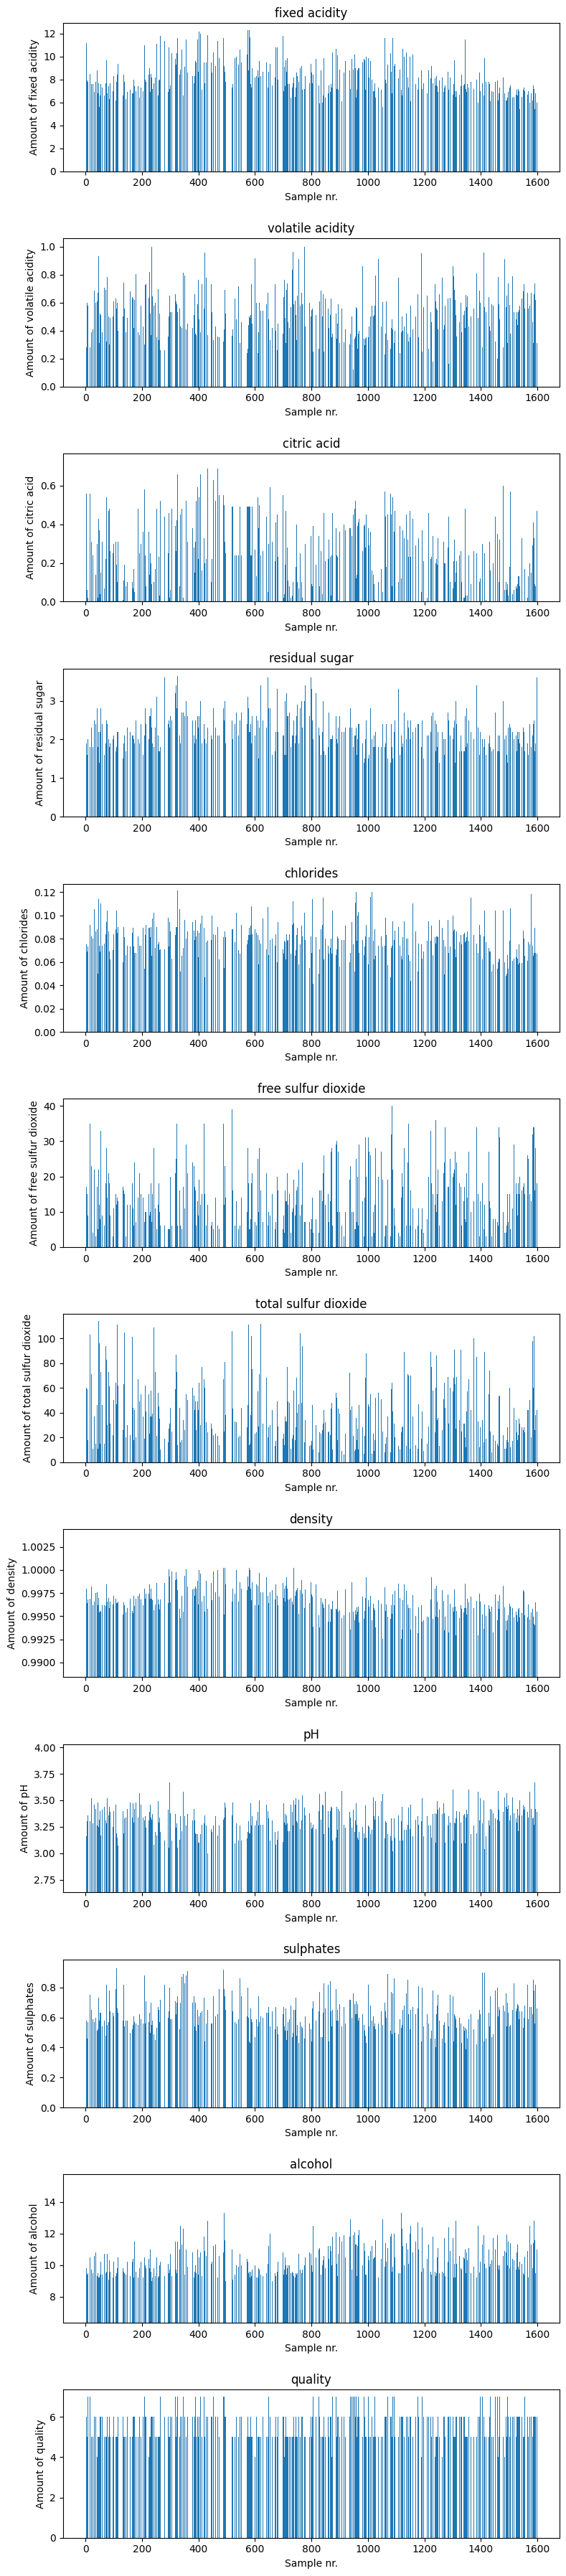

In [8]:
def bar_subplots(dataFrame, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))

    for ax, col in zip(axes, columns):
        ax.bar(dataFrame.index, dataFrame[col])
        ax.set_title(col)
        ax.set_xlabel("Sample nr.")
        ax.set_ylabel(f"Amount of {col}")
        if col == "density":
            set_granularity(col, 1000, dataFrame, ax)
        elif col == "pH":
            set_granularity(col, 1000, dataFrame, ax)
        elif col == "alcohol":
            set_granularity(col, 100, dataFrame, ax)

    plt.tight_layout(h_pad=2.0)
    plt.show()

bar_subplots(df, df.columns)


### Show data with histogram chart


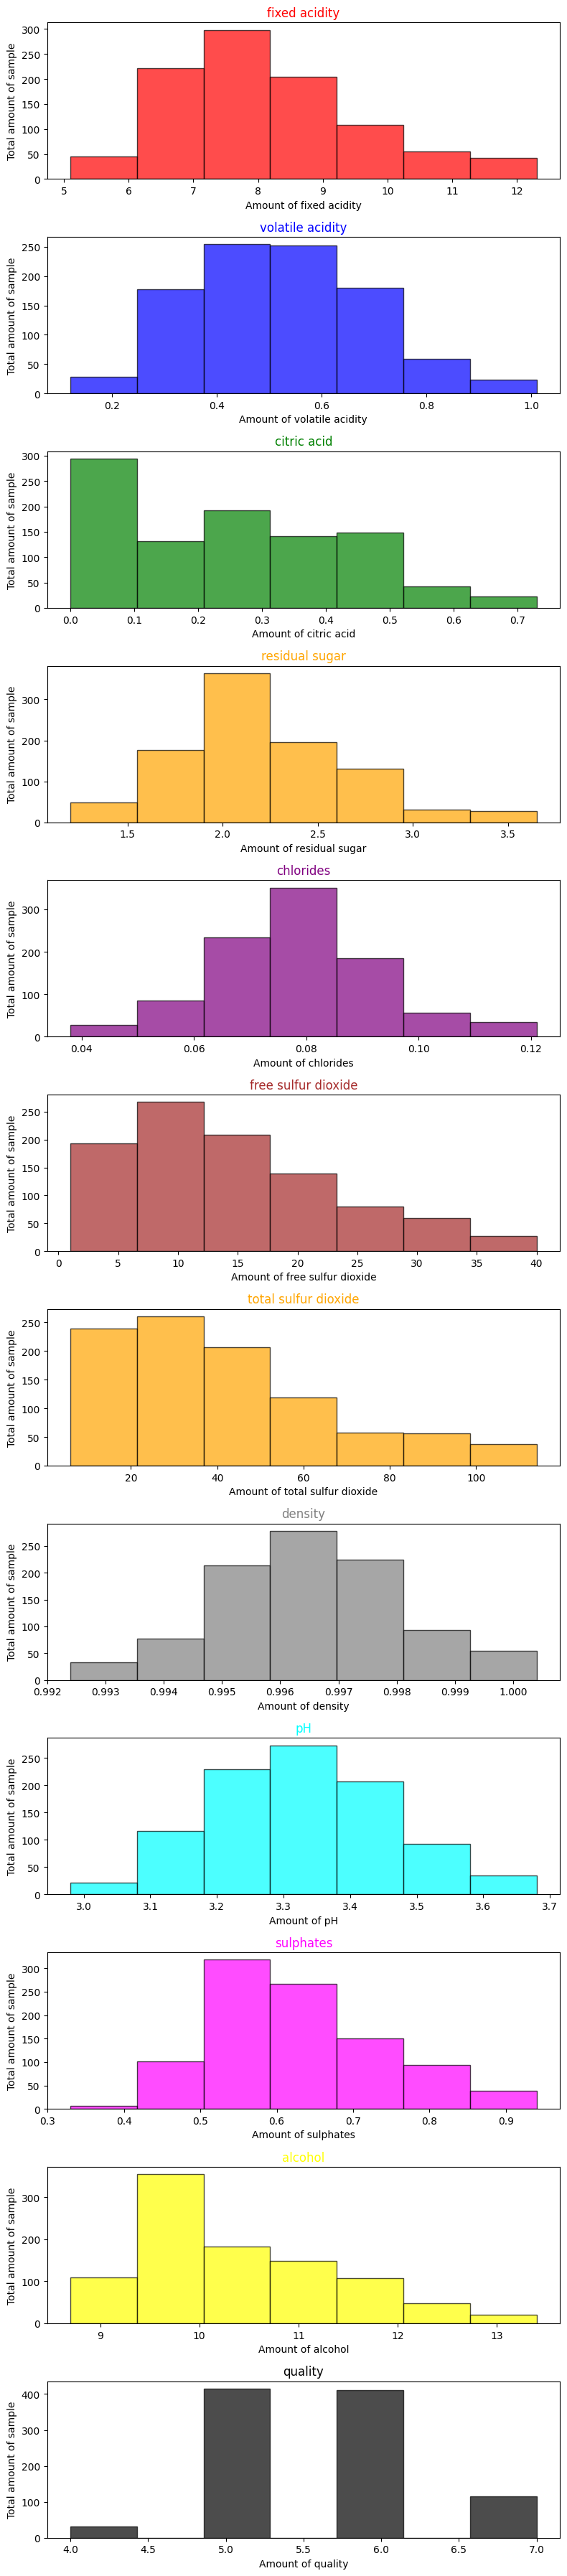

In [9]:
def hist_subplots(df, columns):
    n = len(columns)
    fig, axes = plt.subplots(n, 1, figsize=(8, 3*n))
    colors = ['red','blue','green','orange','purple','brown','orange','gray','cyan','magenta','yellow','black']
    for ax, col,color in zip(axes, columns,colors):
        ax.hist(df[col],bins=7, edgecolor='black', color=color, alpha=0.7)
        ax.set_title(col,color=color)
        ax.set_ylabel("Total amount of sample")
        ax.set_xlabel(f"Amount of {col}")
        plt.tight_layout()
    plt.show()

hist_subplots(df, df.columns)


### Good quality wine data graphs

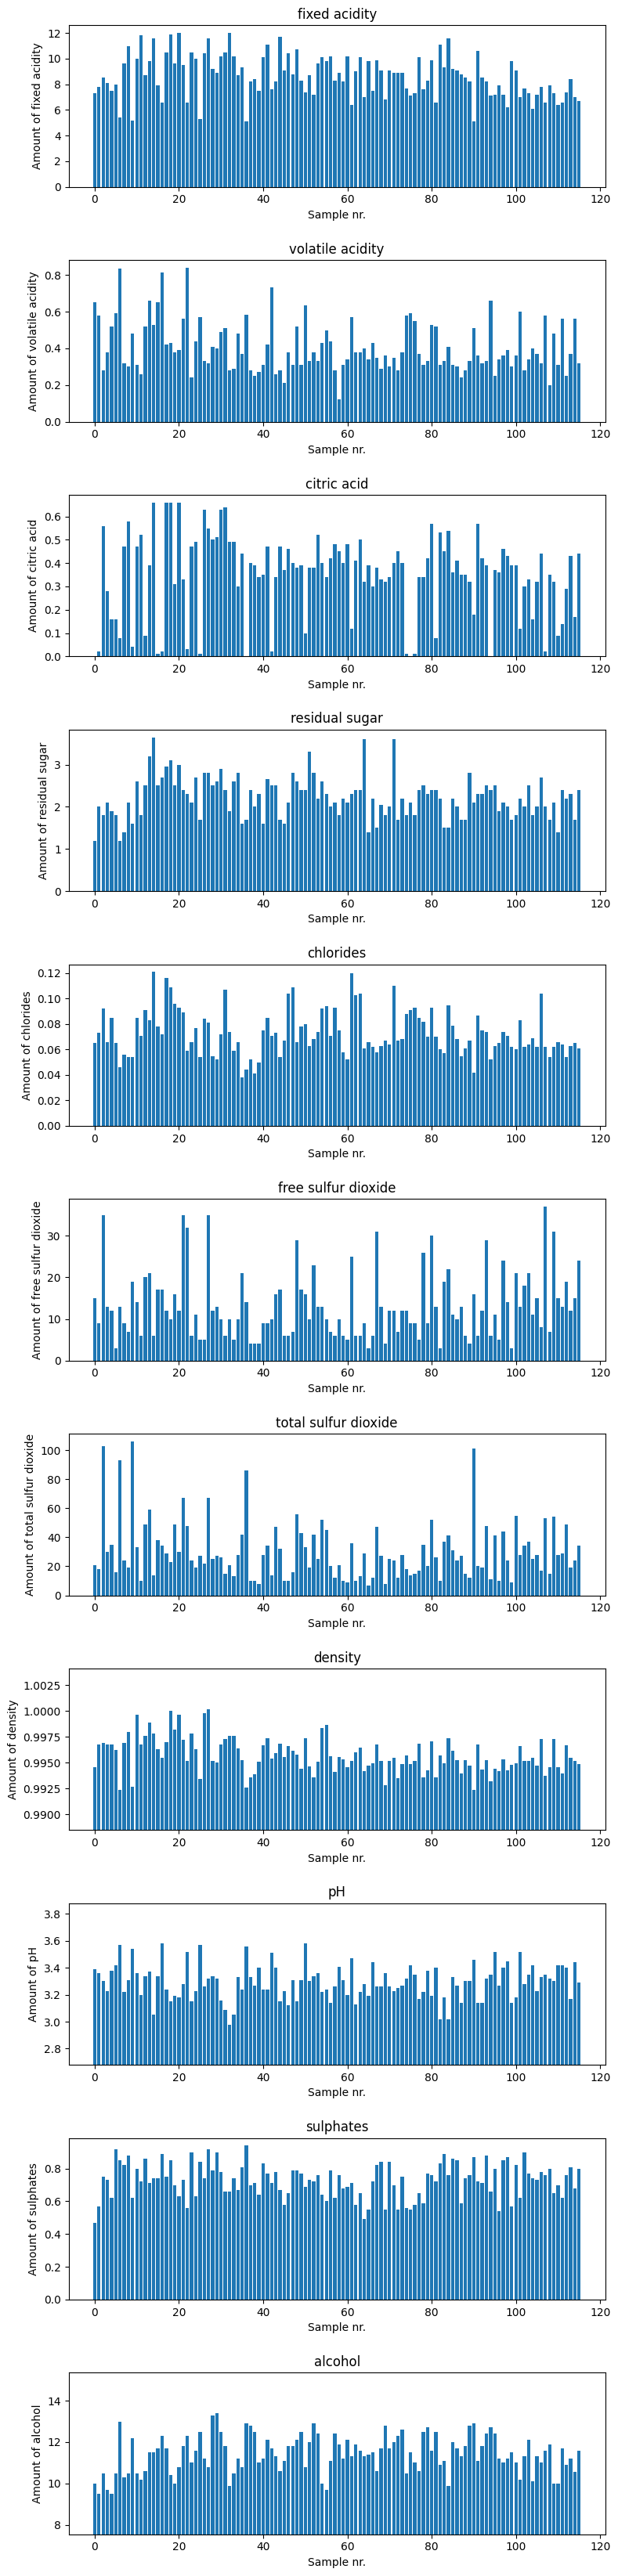

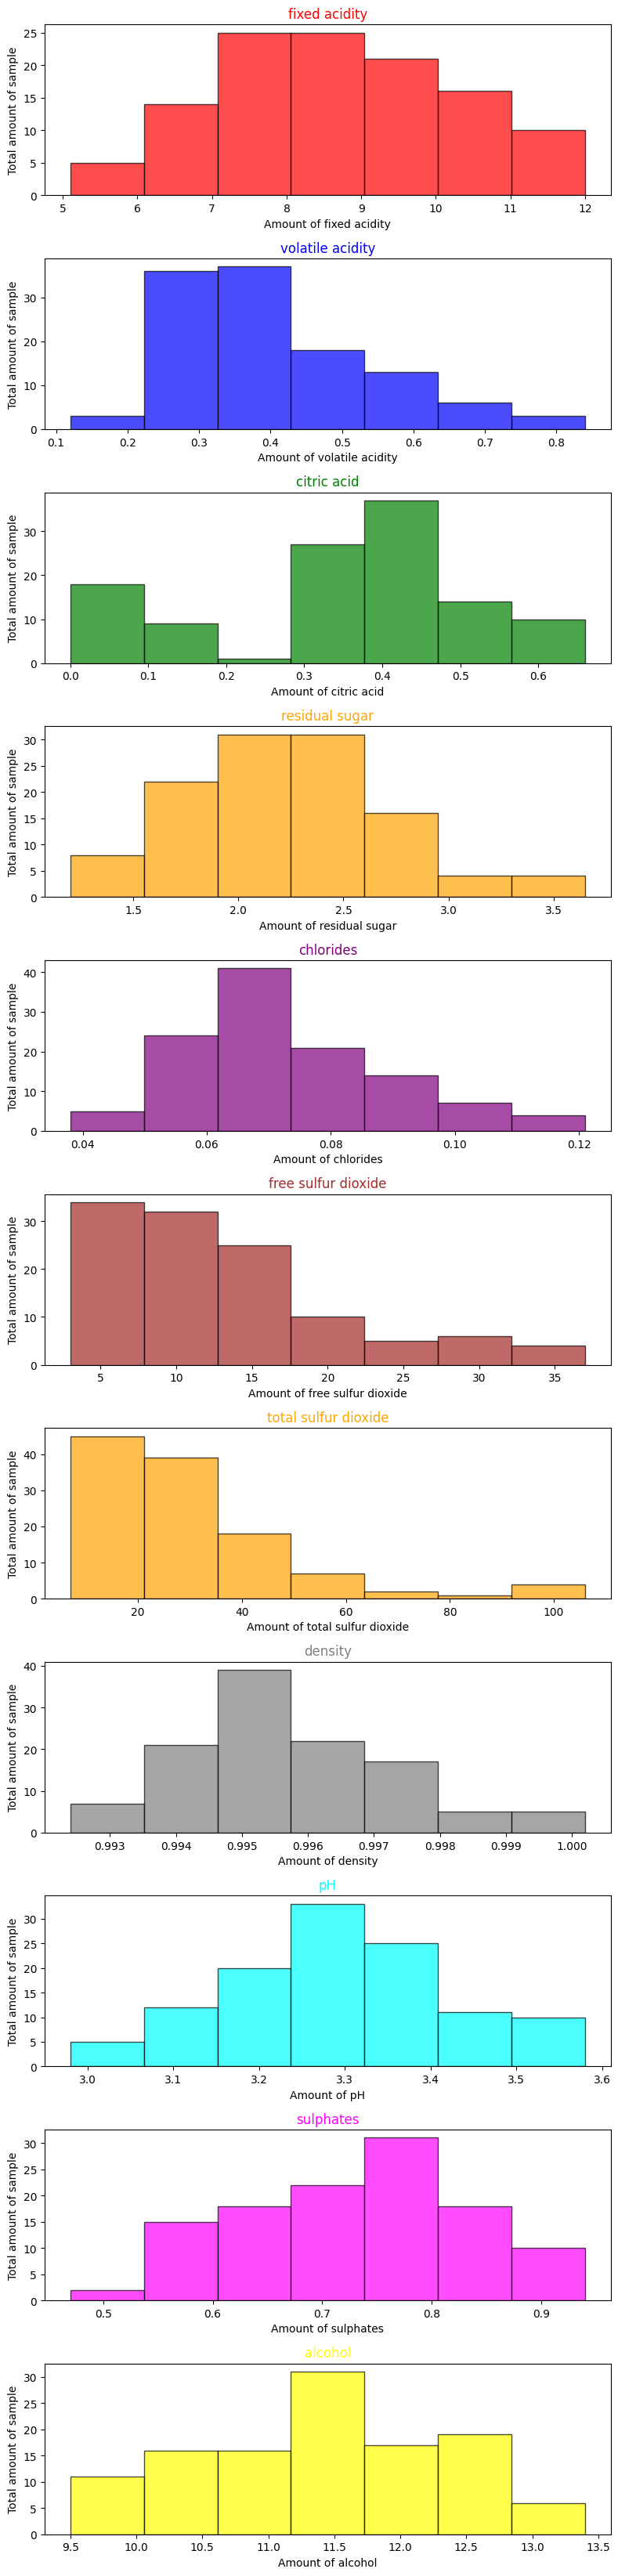

In [10]:
good_quality_wine = df[(df['quality'] >= 6.5)]
good_quality_wine.reset_index(drop=True, inplace=True)

bar_subplots(good_quality_wine, (good_quality_wine.loc[:, good_quality_wine.columns != 'quality']).columns)
hist_subplots(good_quality_wine, (good_quality_wine.loc[:, good_quality_wine.columns != 'quality']).columns)



In [11]:
print("We can see that the data is well distebuted and not to weird, and it seem reasonable")

We can see that the data is well distebuted and not to weird, and it seem reasonable


### Machine learning

In [12]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

print("sklearn libary are now imported!")

sklearn libary are now imported!


### Classifing

In [13]:
# Create a category:
# 1 = high quality
# 0 = low quality
df_cls = df.copy()
good_quality_threshold = 6.5
df_cls["good_quality"] = (df["quality"] >= good_quality_threshold).astype(int)
print("-" * 60 + f"\nClassifing the good quality wine above {good_quality_threshold}, so they are either 1 (high) or 0 (low)\n")
print(df_cls[["quality", "good_quality"]].head(20))

------------------------------------------------------------
Classifing the good quality wine above 6.5, so they are either 1 (high) or 0 (low)

    quality  good_quality
0         5             0
1         5             0
2         5             0
3         6             0
5         5             0
6         5             0
7         7             1
8         7             1
10        5             0
12        5             0
16        7             1
20        6             0
21        5             0
22        5             0
23        5             0
24        6             0
25        5             0
26        5             0
28        5             0
29        6             0


In [14]:
# Get all columns execpt quality
x_clf =df[(df.loc[:,df.columns != 'quality']).columns]
y_clf = df_cls[['good_quality']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)

### Logical regression

In [15]:
print("-" * 60 + "\nMaking and traing a ML with the model of Logictic regression")
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver="liblinear"   
)

# Training the ML on the training data
log_reg.fit(X_train, Y_train)

# Testing the ML against the test data
y_pred_log = log_reg.predict(X_test)

precision = precision_score(y_true=Y_test, y_pred=y_pred_log, average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_log, average='micro')

print("\nResults:\n" + '-' * 20)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}\n")

------------------------------------------------------------
Making and traing a ML with the model of Logictic regression

Results:
--------------------
Accuracy: 0.749
Precision: 0.749
Recall: 0.749



/usr/local/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


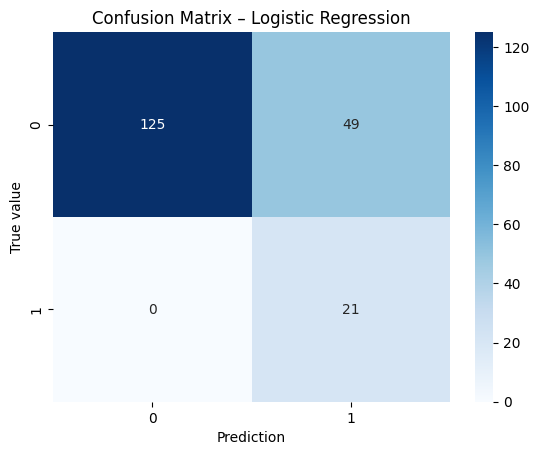

In [16]:
cm_log = confusion_matrix(Y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Prediction")
plt.ylabel("True value")
plt.show()

### Random forest classifier

In [17]:
print("-" * 60 + "\nMaking and traing a ML with the model of Random Forest Classifier")
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

precision = precision_score(y_true=Y_test, y_pred=y_pred_rf_clf,average='micro')
recall = recall_score(y_true=Y_test, y_pred=y_pred_rf_clf, average='micro')

print("\nResults:\n" + "-" * 20)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_rf_clf):.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

------------------------------------------------------------
Making and traing a ML with the model of Random Forest Classifier


/usr/local/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Results:
--------------------
Accuracy: 0.923
Precision: 0.923
Recall: 0.923


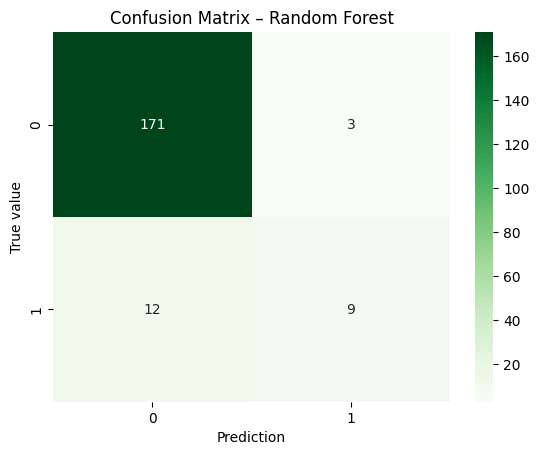

In [18]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediction")
plt.ylabel("True value")
plt.show()

In [19]:
importances = rf_clf.feature_importances_
features = x_clf.columns

df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df_importance.sort_values('Importance', ascending=False))

                 Feature  Importance
10               alcohol    0.148634
9              sulphates    0.140547
7                density    0.096843
1       volatile acidity    0.095396
2            citric acid    0.090183
4              chlorides    0.079820
6   total sulfur dioxide    0.079460
0          fixed acidity    0.077374
8                     pH    0.070487
5    free sulfur dioxide    0.062403
3         residual sugar    0.058852


In [20]:
print("The logistic regression model did the worst of the two models" \
"and we belive it is\nbecuase of the fact the we did not use a Multinomial logistical regression model," \
"but instead a binary one, which in turn\n limits the capablity of the logistical regression model compared " \
"to the random forest classifier model, which\nshows in the result")

The logistic regression model did the worst of the two modelsand we belive it is
becuase of the fact the we did not use a Multinomial logistical regression model,but instead a binary one, which in turn
 limits the capablity of the logistical regression model compared to the random forest classifier model, which
shows in the result


### Recomendation

In [21]:
for col in good_quality_wine.columns:
    meeean = good_quality_wine.head()[f"{col}"].mean()
    stttd = good_quality_wine.head()[f"{col}"].std()
    print(f"{col}: {meeean:.2f} +- {stttd:.2f}")

fixed acidity: 7.84 +- 0.48
volatile acidity: 0.48 +- 0.15
citric acid: 0.20 +- 0.23
residual sugar: 1.80 +- 0.35
chlorides: 0.08 +- 0.01
free sulfur dioxide: 16.80 +- 10.40
total sulfur dioxide: 41.40 +- 35.10
density: 1.00 +- 0.00
pH: 3.33 +- 0.07
sulphates: 0.63 +- 0.12
alcohol: 9.84 +- 0.42
quality: 7.00 +- 0.00


### Recommendation Based on AI Model

In [26]:
importances = rf_clf.feature_importances_
df_importance=pd.DataFrame({
    "Featurs":x_clf.columns,
    "Importance":importances
}).sort_values("Importance",ascending=False)
df_importance.head(6)

,Featurs,Importance
10,alcohol,0.148634
9,sulphates,0.140547
7,density,0.096843
1,volatile acidity,0.095396
2,citric acid,0.090183
4,chlorides,0.079820


In [23]:
top4=df_importance["Featurs"].head(4).tolist()
display(top4)

['alcohol', 'sulphates', 'density', 'volatile acidity']

In [24]:
for top in top4:
    mean=good_quality_wine[top].mean()
    std=good_quality_wine[top].std()
    print(f"{top}: Mean ± Std: {mean:.3f} ± :{std:.3f}")

alcohol: Mean ± Std: 11.424 ± :0.901
sulphates: Mean ± Std: 0.729 ± :0.105
density: Mean ± Std: 0.996 ± :0.002
volatile acidity: Mean ± Std: 0.407 ± :0.139


In [131]:
for feat in top4:
    # print(feat)
    sorted_df = df.sort_values(by=feat, ascending=True)
    # print(sorted_df)
    x=sorted_df[feat]
    y=sorted_df['quality']
    # plt.plot(x,y,'--', linewidth=2, markersize=12)
    # plt.boxplot(x)
    # plt.title(f'{feat}')
    # plt.show()sorted_df[feat]
# Boxplot av quality för varje alcohol-bin





    

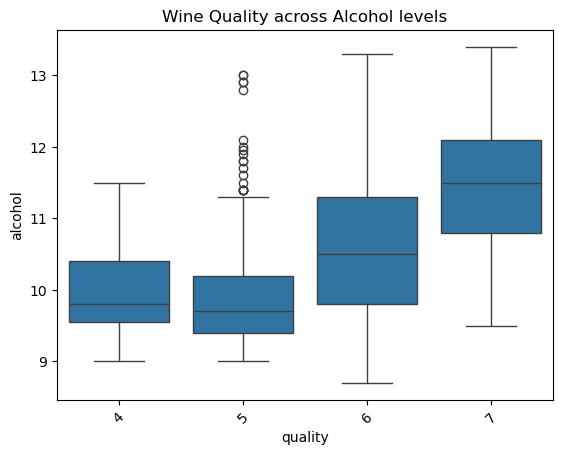

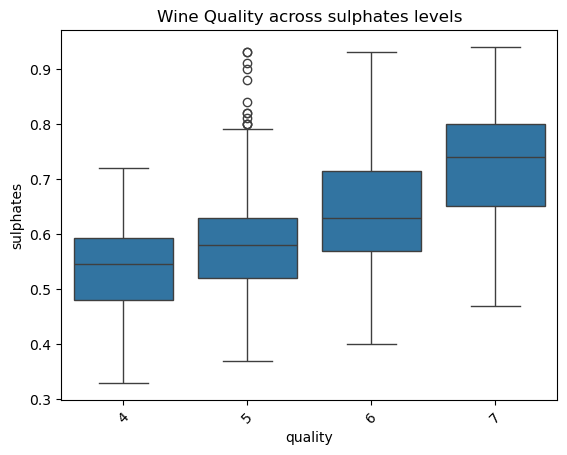

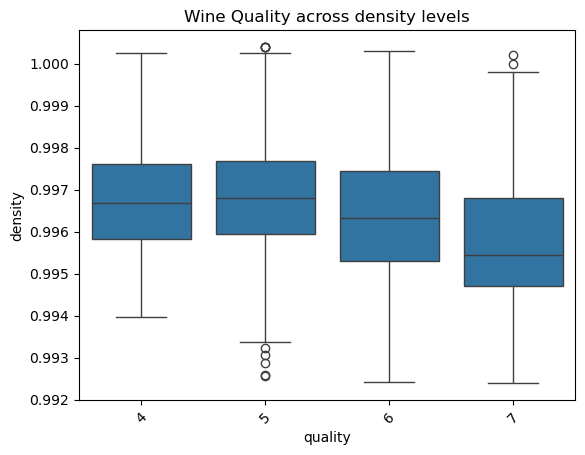

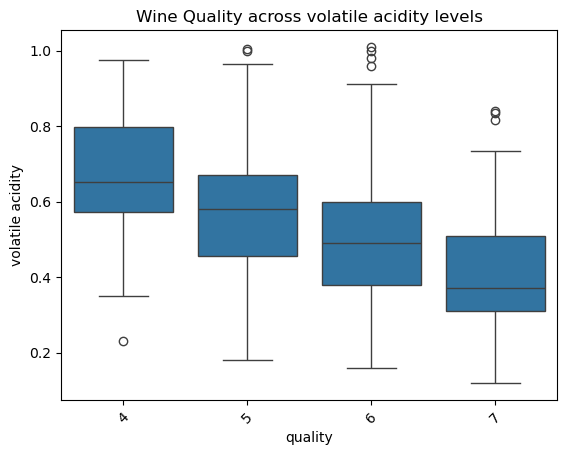

In [138]:
import seaborn as sns

#['alcohol', 'sulphates', 'density', 'volatile acidity']
sorted_df[feat]
# Boxplot av quality för varje alcohol-bin
sns.boxplot(y=sorted_df['alcohol'], x='quality', data=df)
plt.xticks(rotation=45)
plt.title('Wine Quality across Alcohol levels')
plt.show()

sns.boxplot(y=sorted_df['sulphates'], x='quality', data=df)
plt.xticks(rotation=45)
plt.title('Wine Quality across sulphates levels')
plt.show()

sns.boxplot(y=sorted_df['density'], x='quality', data=df)
plt.xticks(rotation=45)
plt.title('Wine Quality across density levels')
plt.show()

sns.boxplot(y=sorted_df['volatile acidity'], x='quality', data=df)
plt.xticks(rotation=45)
plt.title('Wine Quality across volatile acidity levels')
plt.show()